# Projeto - Emissões de gases de efeito estufa no Brasil




* Objetivo do Projeto: Qual atividade econômica brasileira irá afetar mais com o esfeito estufa entre os anos de 2018 e 2030? E qual delas irá minimizar mais esses impactos?

* Descrição do projeto: A partir da análise de dados qualitativos e quantitativos, o projeto objetiva prever qual atividade econômica brasileira irá afetar mais com o esfeito estufa entre os anos de 2018 e 2030. Utilizaremos como forma de mensurar o impacto de cada uma levando em consideração, tanto a quantidade de gás emitido, quanto o tipo e reações dele. Utilizaremos como forma de prever, as tendências de crescimento de cada área, tais como aumento percentual da emissão de um certo gás em uma certa atividade específica ou sua restituição.

* O projeto será dividido em etapas para ficar mais fácil sua compreensão:

* Etapa 1 -> Limpeza da base de dados
* Etapa 2 ->
* Etapa 3 ->
* Etapa 4 ->

fonte: https://basedosdados.org

In [10]:

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
dados =pd.read_csv('MICRODADOS_ENEM_ESCOLA.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 1637: invalid continuation byte

In [11]:
dados.head()

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.17
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.30
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.20
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.56
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.84


### 1 - Limpeza dos Dados

In [13]:
#Renomeando Variáveis
dados = dados.rename(columns={'nivel_1': 'setor'})
dados = dados.rename(columns={'nivel_2': 'processo_emissor'})
dados = dados.rename(columns={'nivel_3': 'forma_emissao'})
dados = dados.rename(columns={'nivel_4': 'processo_especifico'})
dados = dados.rename(columns={'nivel_5': 'tipo_atividade'})
dados = dados.rename(columns={'nivel_6': 'atividade_especifica'})

In [14]:
#Tabela atualizada com novas nomenclaturas
dados.head()

,ano,setor,processo_emissor,forma_emissao,processo_especifico,tipo_atividade,atividade_especifica,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.17
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.30
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.20
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.56
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.84


In [15]:
dados.setor.value_counts(normalize=True).to_frame().round(3)*100 

,setor
Energia,59.0
Mudança de Uso da Terra e Floresta,28.4
Agropecuária,7.2
Processos Industriais,4.1
Resíduos,1.3


In [92]:
# Avaliando a influência dos tipos de gases para o efeito estufa
dados.forma_emissao.value_counts()

Industrial                      175450
Produção de Combustíveis         28800
Mata Atlântica                   24600
Pampa                            23200
Cerrado                          23200
                                 ...  
Produção de Poliestireno            50
Produção de Polietileno PEAD        50
Produção de Polietileno PEBD        50
Produção de Propeno                 50
Produção de Etilbenzeno             50
Name: forma_emissao, Length: 61, dtype: int64

In [ ]:
dados.boxplot('emissao',by = 'setor',figsize=(10,5))
plt.title('Maior Setor emissor de gases por ano de 1970 até 2018')

In [ ]:
# Não é muito útil devemos usar?

dados.produto.value_counts(normalize=True).to_frame().round(3)*100 

In [18]:
# Rever o boxplot

dados.forma_emissao.value_counts(normalize=True).to_frame().round(3)*100 

,forma_emissao
Industrial,38.6
Produção de Combustíveis,6.3
Mata Atlântica,5.4
Pampa,5.1
Cerrado,5.1
...,...
Produção de Poliestireno,0.0
Produção de Polietileno PEAD,0.0
Produção de Polietileno PEBD,0.0
Produção de Propeno,0.0


Text(0.5, 1.0, 'Maior forma de emissão de gases por ano de 1970 até 2018')

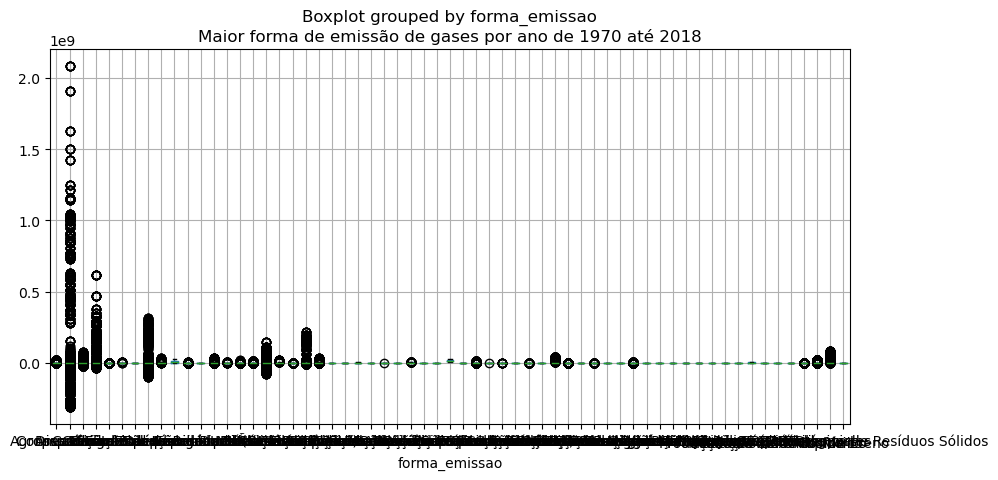

In [19]:
dados.boxplot('emissao',by = 'forma_emissao',figsize=(10,5))
plt.title('Maior forma de emissão de gases por ano de 1970 até 2018')

In [20]:
dados.processo_emissor.value_counts(normalize=True).to_frame()

,processo_emissor
Emissões pela Queima de Combustíveis,0.586457
Alterações de Uso do Solo,0.165439
Solos Manejados,0.053864
Remoção por Mudança de Uso da Terra,0.053864
Remoção por Vegetação Secundária,0.040013
Produção de Metais,0.019567
Remoção em Áreas Protegidas,0.013851
Indústria Química,0.012971
Resíduos Florestais,0.010553
Manejo de Dejetos Animais,0.008135


In [21]:
emissores = dados.loc[(dados.setor == 'Energia') & (dados.emissao) ]
emissores.emissao.sum()

90759814933.68465

In [22]:
emissores = dados.loc[(dados.setor == 'Agropecuária') & (dados.emissao) ]
emissores.emissao.sum()

85495351343.15591

In [23]:
emissores = dados.loc[(dados.setor == 'Mudança de Uso da Terra e Floresta') & (dados.emissao) ]
emissores.emissao.sum()

379303032343.635

In [25]:
pd.crosstab(dados['gas'], dados['forma_emissao'], margins=True)

forma_emissao,Agropecuário,Amazônia,Caatinga,Cerrado,Comercial,Consumo Final Não Energético,Consumo de Barrilha,Diretas,Disposição Final de Resíduos Sólidos,Efluentes Líquidos Domésticos,...,Produção de Vidro,Produção de Ácido Adípico,Produção de Ácido Fosfórico,Produção de Ácido Nítrico,Produção de Óxido de Eteno,Público,Residencial,Transportes,Tratamento Biológico de Resíduos Sólidos,All
gas,,,,,,,,,,,,,,,,,,,,,
C2F6 (t),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
CF4 (t),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
CH4 (t),800,100,100,100,800,0,0,1100,250,50,...,0,0,0,0,50,850,450,1150,50,24950
CO (t),750,0,0,0,750,0,0,100,0,0,...,0,50,0,0,0,800,400,1100,0,21700
CO2 (t),450,3050,2850,3200,550,50,50,400,0,0,...,100,0,50,0,50,600,300,1000,0,37550
CO2e (t) GTP-AR2,900,3150,2950,3300,900,50,50,2850,250,50,...,100,50,50,50,50,950,450,1700,50,49750
CO2e (t) GTP-AR4,900,3150,2950,3300,900,50,50,2850,250,50,...,100,50,50,50,50,950,450,1700,50,49750
CO2e (t) GTP-AR5,900,3150,2950,3300,900,50,50,2850,250,50,...,100,50,50,50,50,950,450,1700,50,49750
CO2e (t) GWP-AR2,900,3150,2950,3300,900,50,50,2850,250,50,...,100,50,50,50,50,950,450,1700,50,49750


### Eliminação de dados prejudiciais ao projeto 
 Baseado na tabela cruzada entre a forma de emissão e o gás utilizado, perecebe-se que há uma uma vasta dispersão